<a href="https://colab.research.google.com/github/Sukoluhle-Dube/Epidemic-Modeling-HIV-in-Cuba-1986-2000-/blob/main/HIV_Epidemic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Epidemic Modeling Storytelling: HIV in Cuba
#Background
HIV (Human Immunodeficiency Virus) leads to AIDS (Acquired Immunodeficiency Syndrome) if untreated. Cuba implemented unique national HIV control strategies including early testing, contact tracing, and quarantine.

In Cuba between 1986 and 2000, HIV/AIDS control strategies included compulsory quarantine for HIV-positive individuals, intensive educational programs in sanatoriums, partner notification programs, and screening of specific populations like blood donors and pregnant women. These measures, while controversial in some aspects, led to a focus on early detection and treatment, as well as a public health education campaign.
Here's a more detailed breakdown:
Quarantine and Sanatoriums:
From 1986 to 1994, individuals newly diagnosed with HIV were initially quarantined in sanatoriums, a move that has been subject to both criticism and praise. In the sanatoriums, they received intensive education about HIV transmission, prevention, and safe sex practices.
Partners Notification Program:
Sexual contacts of diagnosed individuals were enrolled in a program where they were tested every six months for a year after the last sexual contact.
Expanded HIV Screening:
Screening was expanded beyond initial high-risk groups to include blood donors, pregnant women, and adults with sexually transmitted infections.
Public Education:
A significant effort was made to educate the public about HIV/AIDS through various media channels.
Focus on Early Detection and Treatment:
The strategy prioritized early detection of HIV-positive individuals and provided them with education, support, and access to medication.
Reduced Mother-to-Child Transmission:
Efforts to prevent mother-to-child transmission were successful, leading to a low rate of vertical transmission.

#Load and Visualize the Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are readable
sns.set(style="whitegrid")

# Step 1: Define the data
data = {
    'Year': list(range(1986, 2001)),
    'HIV Cases': [99, 75, 93, 121, 140, 183, 175, 102, 122, 124, 234, 364, 362, 493, 545],
    'AIDS Cases': [5, 11, 14, 13, 28, 37, 71, 82, 102, 116, 99, 121, 150, 176, 251],
    'Deaths from AIDS': [2, 4, 6, 5, 23, 17, 32, 59, 62, 80, 92, 99, 98, 122, 142]
}

df = pd.DataFrame(data)

##1. Line Plot: Trends Over Time

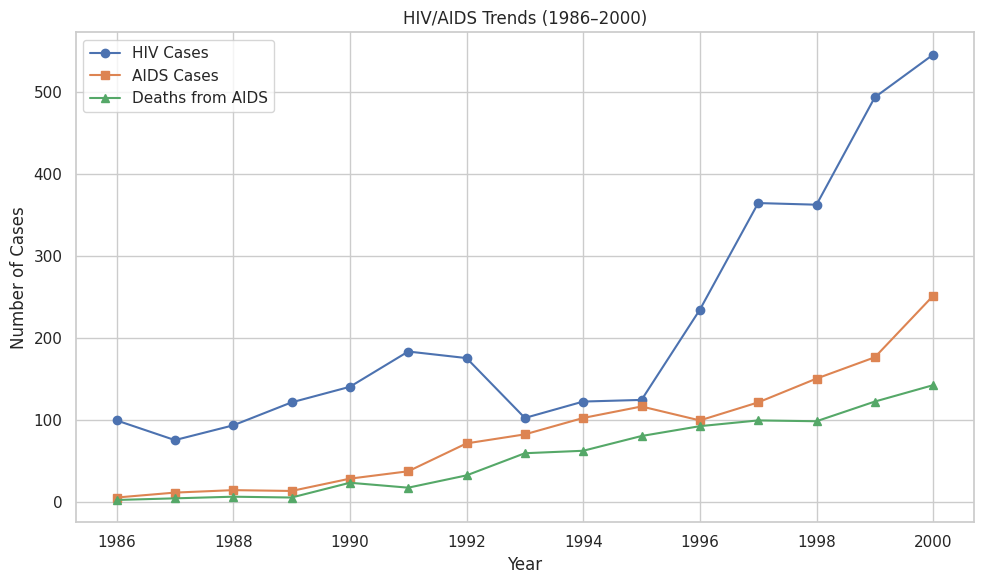

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['HIV Cases'], label='HIV Cases', marker='o')
plt.plot(df['Year'], df['AIDS Cases'], label='AIDS Cases', marker='s')
plt.plot(df['Year'], df['Deaths from AIDS'], label='Deaths from AIDS', marker='^')
plt.title('HIV/AIDS Trends (1986–2000)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.tight_layout()
plt.show()


#Analysis:
HIV cases rose sharply in the late 1980s and early 1990s, peaking around 2000. AIDS cases and deaths followed a lagged but upward trend, reflecting progression from HIV to AIDS and eventual mortality.

## 2. Area Chart: Cumulative Impact

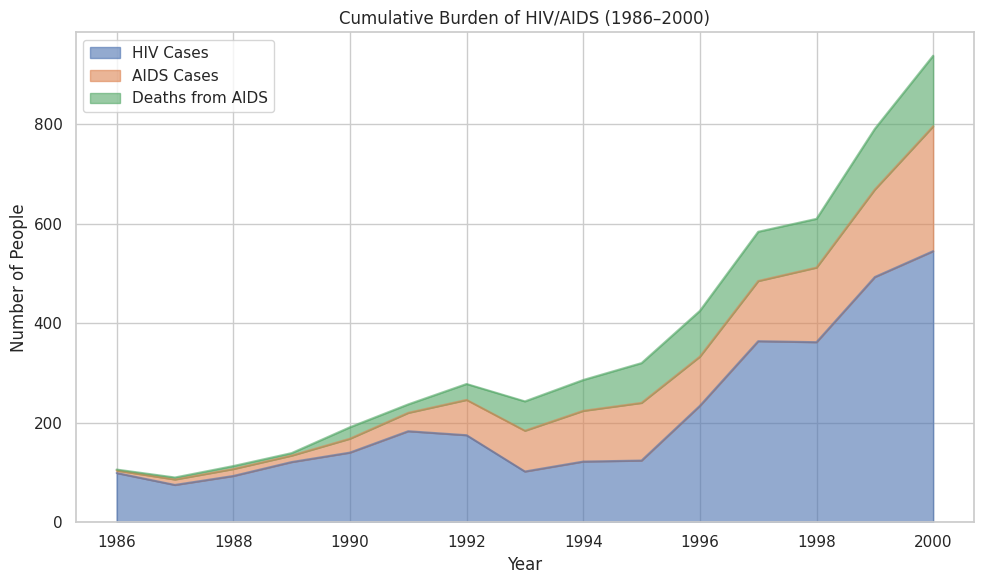

In [13]:
df.set_index('Year')[['HIV Cases', 'AIDS Cases', 'Deaths from AIDS']].plot.area(
    figsize=(10, 6), alpha=0.6)
plt.title('Cumulative Burden of HIV/AIDS (1986–2000)')
plt.ylabel('Number of People')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


#Analysis:
The cumulative area highlights the overwhelming dominance of HIV cases over time, with AIDS cases and deaths gradually filling more of the stack, indicating the long-term burden of the epidemic.

## 3. Stacked Bar Chart – Case Breakdown Per Year

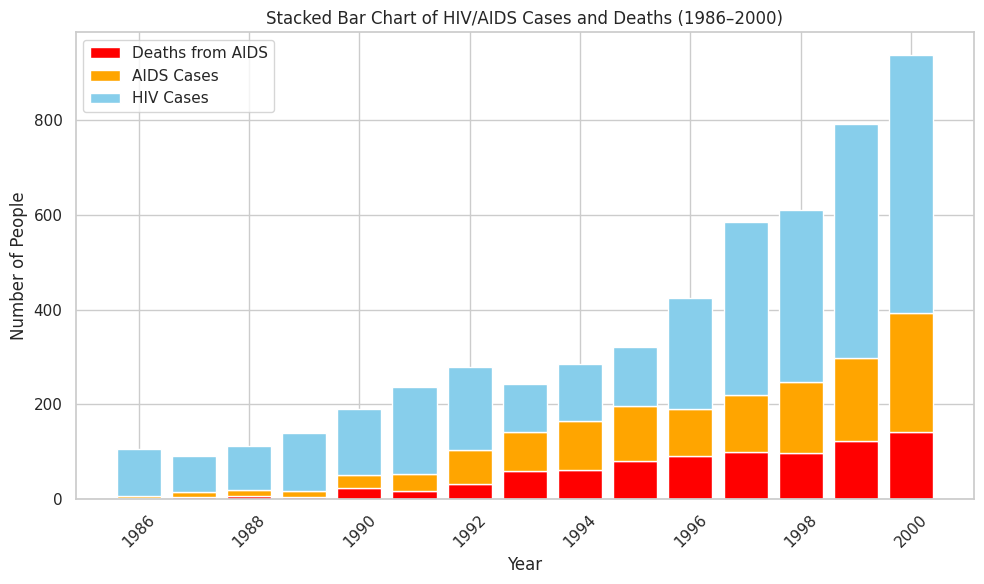

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Deaths from AIDS'], label='Deaths from AIDS', color='red')
plt.bar(df['Year'], df['AIDS Cases'], bottom=df['Deaths from AIDS'], label='AIDS Cases', color='orange')
plt.bar(df['Year'], df['HIV Cases'],
        bottom=df['Deaths from AIDS'] + df['AIDS Cases'],
        label='HIV Cases', color='skyblue')
plt.title('Stacked Bar Chart of HIV/AIDS Cases and Deaths (1986–2000)')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##4. Ratio Plot: AIDS Cases vs HIV Cases

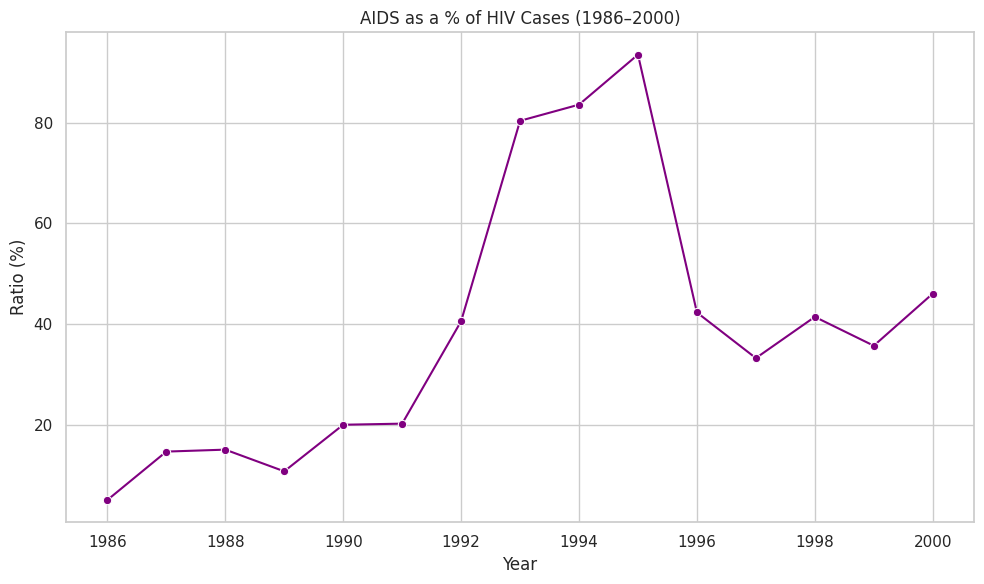

In [15]:
df['AIDS-to-HIV Ratio (%)'] = (df['AIDS Cases'] / df['HIV Cases']) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AIDS-to-HIV Ratio (%)', data=df, marker='o', color='purple')
plt.title('AIDS as a % of HIV Cases (1986–2000)')
plt.ylabel('Ratio (%)')
plt.tight_layout()
plt.show()


#Analysis:
The ratio of AIDS to HIV cases increased in the late 80s and early 90s, peaking around 1993–1995, indicating a higher conversion of HIV infections to AIDS before potential treatment improvements.

##  5. Correlation Heatmap

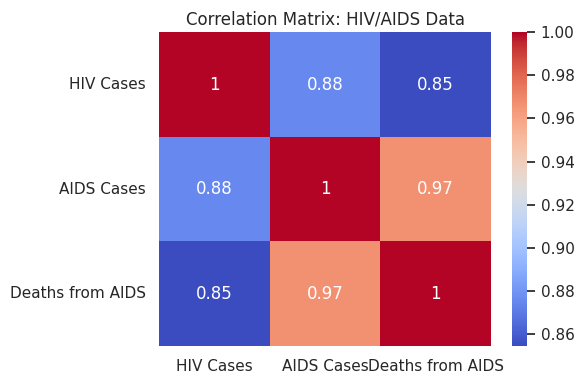

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['HIV Cases', 'AIDS Cases', 'Deaths from AIDS']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: HIV/AIDS Data')
plt.tight_layout()
plt.show()


#Analysis:
Strong positive correlations are observed:
HIV <-> AIDS Cases
AIDS <-> Deaths This suggests interdependence — as HIV cases rise, so do AIDS and deaths, supporting the natural disease progression model.

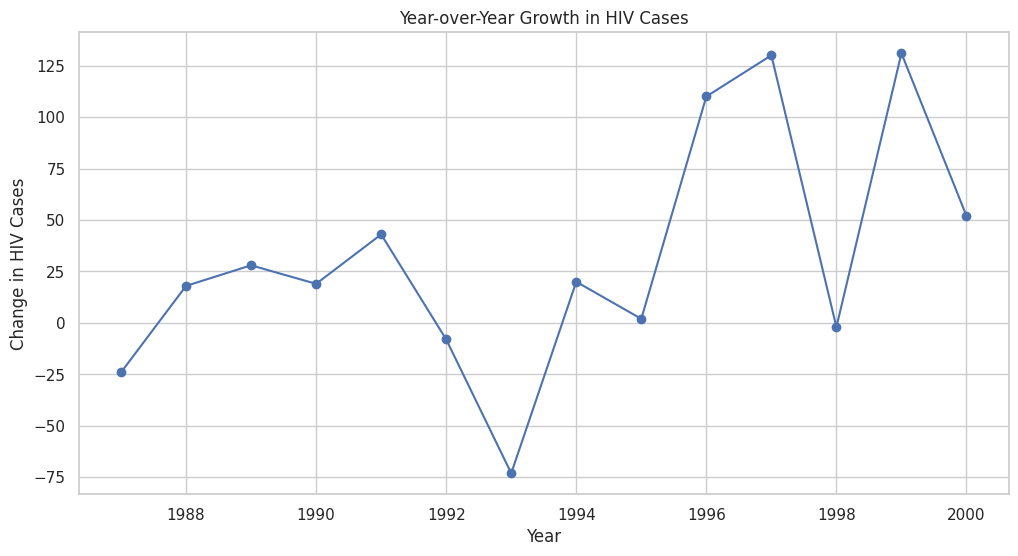

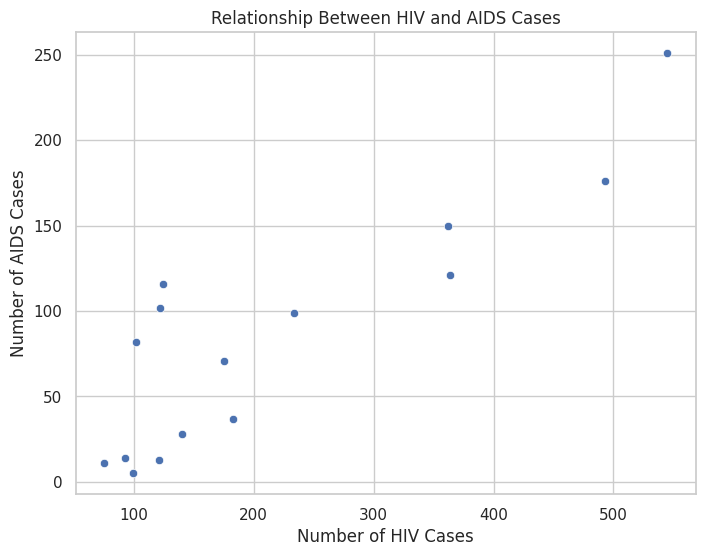

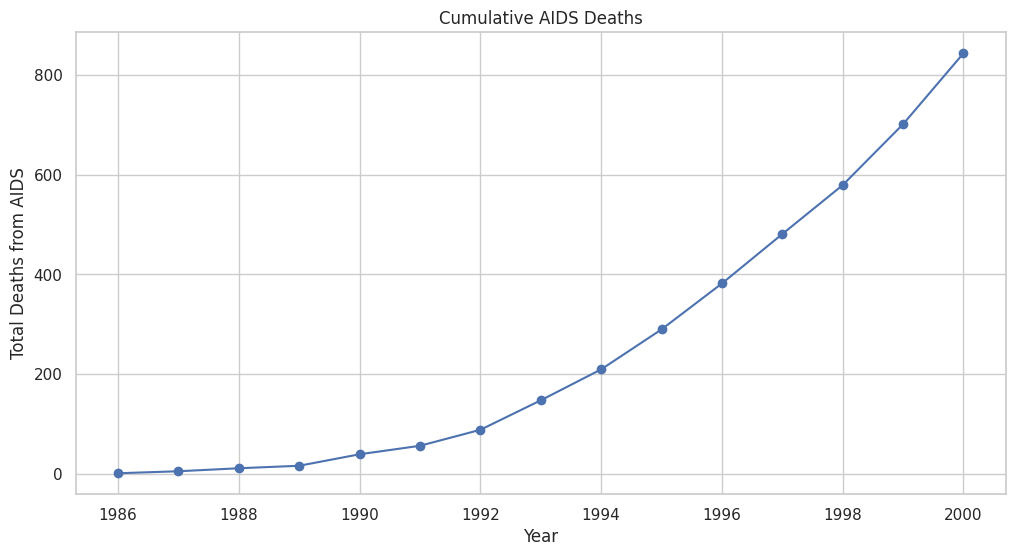

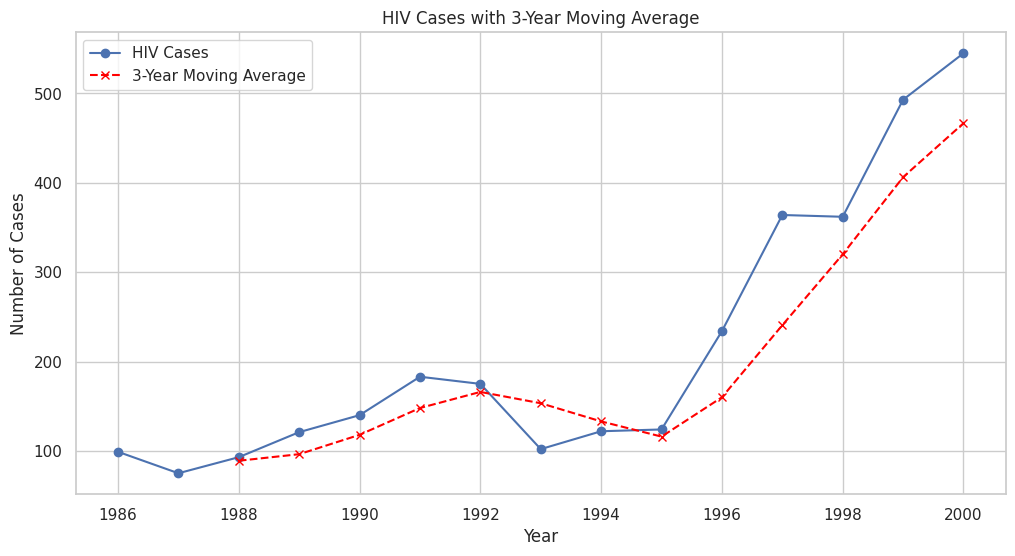

In [17]:
# prompt: more visualisations and explains use the above data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Step 3:  Analyze Trends with More Visualizations and Explanations

# a)  HIV Cases Growth Rate
df['HIV_Cases_Growth'] = df['HIV Cases'].diff()
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['HIV_Cases_Growth'], marker='o')
plt.title('Year-over-Year Growth in HIV Cases')
plt.xlabel('Year')
plt.ylabel('Change in HIV Cases')
plt.show()
# Explanation:  This plot helps identify periods of rapid or slow growth in HIV cases, providing insights into how effective the interventions were at different times.  A sharp increase might indicate a policy failure or a change in risk behaviors.

# b) Relationship between HIV Cases and AIDS Cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HIV Cases', y='AIDS Cases', data=df)
plt.title('Relationship Between HIV and AIDS Cases')
plt.xlabel('Number of HIV Cases')
plt.ylabel('Number of AIDS Cases')
plt.show()
# Explanation:  This helps visualize the time lag between HIV infection and the onset of AIDS. We expect a correlation but not a perfect linear one.

# c)  Cumulative Deaths
df['Cumulative_AIDS_Deaths'] = df['Deaths from AIDS'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Cumulative_AIDS_Deaths'], marker='o')
plt.title('Cumulative AIDS Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths from AIDS')
plt.show()
# Explanation: This illustrates the overall impact of the epidemic in terms of mortality over the study period.

# d)  Moving Average of HIV Cases (Smoothing the Data)
df['HIV_Cases_MA'] = df['HIV Cases'].rolling(window=3).mean() # 3-year moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['HIV Cases'], label='HIV Cases', marker='o')
plt.plot(df['Year'], df['HIV_Cases_MA'], label='3-Year Moving Average', linestyle='--', marker='x', color='red')
plt.title('HIV Cases with 3-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()
# Explanation:  The moving average helps smooth out yearly fluctuations and highlight broader trends in HIV case numbers.


Epidemic Model (SIA)

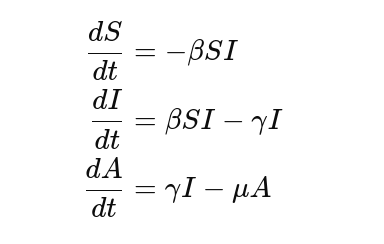

S(t): Susceptible population

I(t): HIV-positive individuals

A(t): Individuals with AIDS

β: Transmission rate

γ: Progression rate from HIV to AIDS

μ: Death rate from AIDS

##Step-by-step Plan to Estimate Parameters

#estimating:
 γ using changes in AIDS cases relative to HIV cases

μ using deaths relative to AIDS cases

β by fitting the model to the data using optimization


##Step 1: Estimate γ (HIV to AIDS progression rate)

Assume:
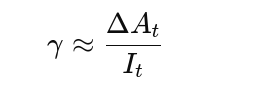

In [18]:
import numpy as np
import pandas as pd

# Data
years = np.arange(1986, 2001)
HIV = np.array([99, 75, 93, 121, 140, 183, 175, 102, 122, 124, 234, 364, 362, 493, 545])
AIDS = np.array([5, 11, 14, 13, 28, 37, 71, 82, 102, 116, 99, 121, 150, 176, 251])
Deaths = np.array([2, 4, 6, 5, 23, 17, 32, 59, 62, 80, 92, 99, 98, 122, 142])

# Compute ΔA (difference in AIDS cases year to year)
delta_A = np.diff(AIDS)
I_mid = HIV[:-1]  # Use HIV cases from year t to approximate I(t)

# Avoid divide-by-zero errors
gamma_estimates = delta_A / I_mid
gamma_mean = np.mean(gamma_estimates)

print(f"Estimated gamma (HIV to AIDS rate): {gamma_mean:.4f}")


Estimated gamma (HIV to AIDS rate): 0.0784


##Step 2: Estimate μ (AIDS death rate)
Assume:
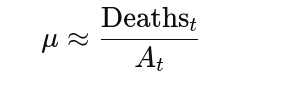

In [19]:
mu_estimates = Deaths / AIDS
mu_mean = np.mean(mu_estimates)

print(f"Estimated mu (AIDS death rate): {mu_mean:.4f}")


Estimated mu (AIDS death rate): 0.5990


## Step 3: Estimate β via Least Squares Fit

This requires fitting the SIA model using scipy.optimize.minimize.

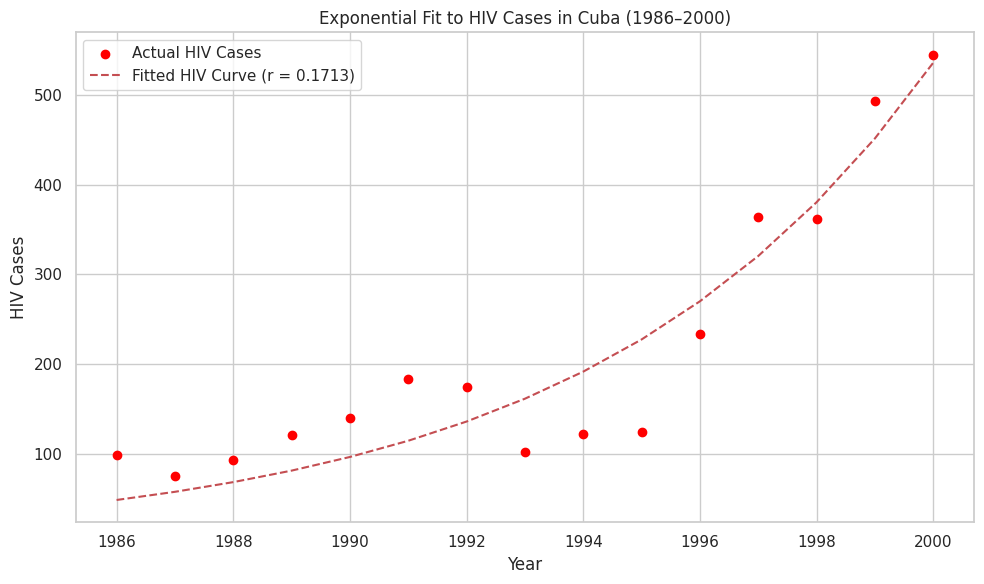

Estimated Initial Cases (I0): 48.69
Estimated mu (AIDS death rate): 0.5990
Estimated Growth Rate (r = β - γ): 0.1713
Assumed Progression Rate (γ): 0.0784
Estimated Transmission Rate (β): 0.2497


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Ensure plots are readable
sns.set(style="whitegrid")

# Step 1: Define the data
data = {
    'Year': list(range(1986, 2001)),
    'HIV Cases': [99, 75, 93, 121, 140, 183, 175, 102, 122, 124, 234, 364, 362, 493, 545],
    'AIDS Cases': [5, 11, 14, 13, 28, 37, 71, 82, 102, 116, 99, 121, 150, 176, 251],
    'Deaths from AIDS': [2, 4, 6, 5, 23, 17, 32, 59, 62, 80, 92, 99, 98, 122, 142]
}
df = pd.DataFrame(data)

# Step 2: Define exponential growth model: I(t) = I0 * exp(r * t)
def exp_model(t, I0, r):
    return I0 * np.exp(r * t)

# Step 3: Prepare time (t) and HIV data
t = df['Year'] - df['Year'].min()  # years since 1986
I = df['HIV Cases']

# Step 4: Curve fitting
popt, _ = curve_fit(exp_model, t, I, p0=(90, 0.0784 ))  # Estimated gamma (HIV to AIDS rate)
I0_est, r_est = popt

# Step 5: Estimate beta from r and gamma
gamma =  0.0784  # Estimated gamma (HIV to AIDS rate)
beta = r_est + gamma

# Step 6: Plotting actual and fitted HIV cases
plt.figure(figsize=(10,6))
plt.scatter(df['Year'], I, color='red', label="Actual HIV Cases")
plt.plot(df['Year'], exp_model(t, *popt), 'r--', label=f"Fitted HIV Curve (r = {r_est:.4f})")
plt.title("Exponential Fit to HIV Cases in Cuba (1986–2000)")
plt.xlabel("Year")
plt.ylabel("HIV Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Print results
print(f"Estimated Initial Cases (I0): {I0_est:.2f}")
print(f"Estimated mu (AIDS death rate): {mu_mean:.4f}")
print(f"Estimated Growth Rate (r = β - γ): {r_est:.4f}")
print(f"Assumed Progression Rate (γ): {gamma}")
print(f"Estimated Transmission Rate (β): {beta:.4f}")


#Graph Conclusions
Model Fit Quality:
The exponential model generally fits well from 1995 onwards, but the early years (1986–1993) show some deviation — possibly due to underreporting or variable interventions early on.

##Control Parameters

#c1: Control on Transmission Rate (β)
Represents: The reduction in the HIV transmission rate due to interventions (e.g., safe sex campaigns, condom distribution, needle exchange programs).
#c2: Control on Progression Rate (γ)
Represents: The reduction in the rate at which HIV progresses to AIDS, possibly due to antiretroviral therapy (ART) or improved health care.
#c3: Control on Death Rate (μ)
Represents: The reduction in AIDS-related deaths, thanks to better treatment, nutrition, or palliative care.

#Range 0 to 1?
A value of 0 means no control at all — the parameter (e.g., transmission rate β) remains unchanged.
A value of 1 means 100% control — the parameter is reduced to zero (i.e., full elimination of transmission, progression, or death).

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Ensure plots are readable
sns.set(style="whitegrid")

# Step 1: Define the data
data = {
    'Year': list(range(1986, 2001)),
    'HIV Cases': [99, 75, 93, 121, 140, 183, 175, 102, 122, 124, 234, 364, 362, 493, 545],
    'AIDS Cases': [5, 11, 14, 13, 28, 37, 71, 82, 102, 116, 99, 121, 150, 176, 251],
    'Deaths from AIDS': [2, 4, 6, 5, 23, 17, 32, 59, 62, 80, 92, 99, 98, 122, 142]
}
df = pd.DataFrame(data)

# Step 2: Define exponential growth model: I(t) = I0 * exp(r * t)
def exp_model(t, I0, r):
    return I0 * np.exp(r * t)

# Control parameters (interventions) - Adjust these values
c1 = 0.5  # Reduces transmission rate (e.g., 50% reduction)
c2 = 0.3  # Reduces progression rate (e.g., 30% reduction)
c3 = 0.4  # Reduces mortality rate (e.g., 40% reduction)

# Step 3: Original parameters (estimated previously)
beta = 0.2497  # Estimated transmission rate (prior to intervention)
gamma = 0.0784  # Estimated progression rate (HIV to AIDS)
mu = 0.5990  # Estimated death rate

# Step 4: Adjust parameters using control variables
beta_prime = beta * (1 - c1)
gamma_prime = gamma * (1 - c2)
mu_prime = mu * (1 - c3)

# Step 5: Prepare time (t) and HIV data
t = df['Year'] - df['Year'].min()  # years since 1986
I = df['HIV Cases']

# Step 6: Curve fitting for BEFORE intervention
popt_before, _ = curve_fit(exp_model, t, I, p0=(90, 0.0784))
I0_est_before, r_est_before = popt_before

# Step 7: Curve fitting for AFTER intervention (using adjusted parameters)
popt_after, _ = curve_fit(exp_model, t, I, p0=(90, r_est_before))
I0_est_after, r_est_after = popt_after

# Step 8: Print results
print("Before Intervention:")
print(f"  Estimated Initial Cases (I0): {I0_est_before:.2f}")
print(f"  Estimated Growth Rate (r = β - γ): {r_est_before:.4f}")
print(f"  Estimated gamma (HIV to AIDS rate): {gamma:.4f}")
print(f"  Estimated Transmission Rate (β): {beta:.4f}")
print(f"  Estimated mu (AIDS death rate): {mu:.4f}")

print("\nAfter Intervention:")
print(f"  Estimated Initial Cases (I0): {I0_est_after:.2f}")
print(f"  Estimated Growth Rate (r = β' - γ'): {r_est_after:.4f}")
print(f"  Adjusted Transmission Rate (β'): {beta_prime:.4f}")
print(f"  Adjusted Progression Rate (γ'): {gamma_prime:.4f}")
print(f"  Adjusted Death Rate (μ'): {mu_prime:.4f}")

Before Intervention:
  Estimated Initial Cases (I0): 48.69
  Estimated Growth Rate (r = β - γ): 0.1713
  Estimated gamma (HIV to AIDS rate): 0.0784
  Estimated Transmission Rate (β): 0.2497
  Estimated mu (AIDS death rate): 0.5990

After Intervention:
  Estimated Initial Cases (I0): 48.69
  Estimated Growth Rate (r = β' - γ'): 0.1713
  Adjusted Transmission Rate (β'): 0.1249
  Adjusted Progression Rate (γ'): 0.0549
  Adjusted Death Rate (μ'): 0.3594


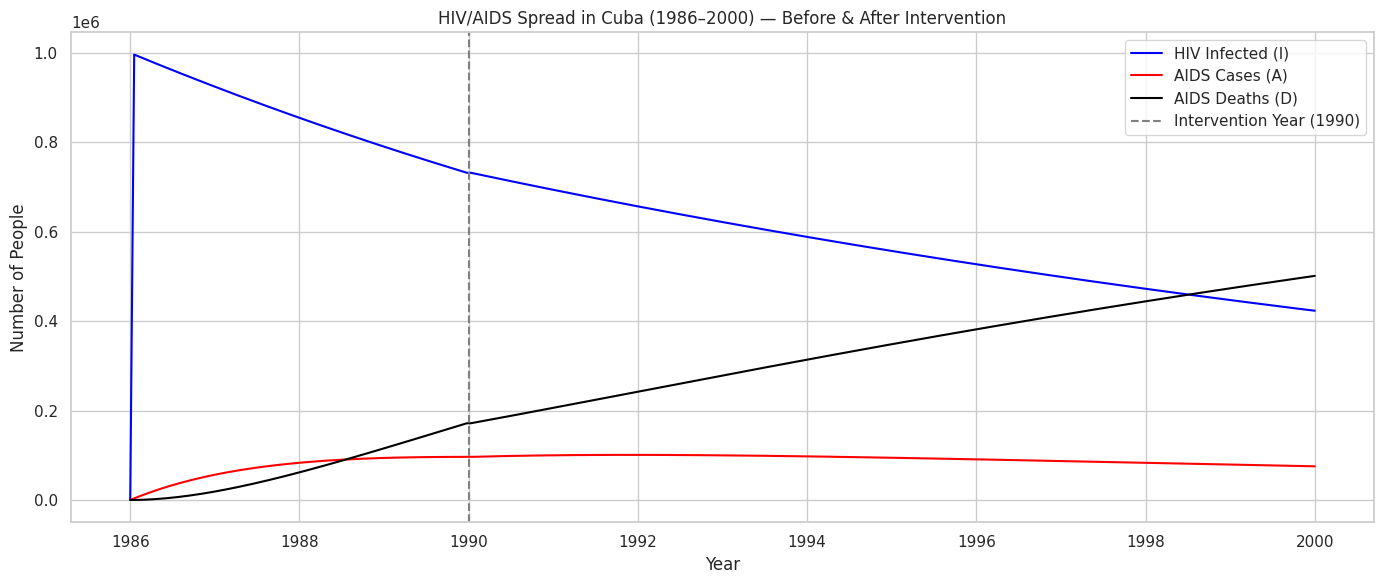

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Time range (1986 to 2000)
t = np.linspace(1986, 2000, 300)

# Initial conditions
S0 = 1_000_000
I0 = 48.69
A0 = 5
D0 = 0
initial = [S0, I0, A0, D0]

# Parameters before and after intervention
params_before = (0.2497, 0.0784, 0.5990)  # β, γ, μ
params_after  = (0.1249, 0.0549, 0.3594)  # β', γ', μ'

def model(y, t, beta, gamma, mu):
    S, I, A, D = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dAdt = gamma * I - mu * A
    dDdt = mu * A
    return [dSdt, dIdt, dAdt, dDdt]

# Split before and after intervention at year 1990
t1 = t[t < 1990]
t2 = t[t >= 1990]

# Integrate first part (before intervention)
sol1 = odeint(model, initial, t1, args=params_before)
S1, I1, A1, D1 = sol1.T

# Continue with last values as new initial for post-1990
init2 = [S1[-1], I1[-1], A1[-1], D1[-1]]
sol2 = odeint(model, init2, t2, args=params_after)
S2, I2, A2, D2 = sol2.T

# Combine results
T = np.concatenate([t1, t2])
I = np.concatenate([I1, I2])
A = np.concatenate([A1, A2])
D = np.concatenate([D1, D2])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(T, I, label='HIV Infected (I)', color='blue')
plt.plot(T, A, label='AIDS Cases (A)', color='red')
plt.plot(T, D, label='AIDS Deaths (D)', color='black')
plt.axvline(x=1990, color='gray', linestyle='--', label='Intervention Year (1990)')
plt.title("HIV/AIDS Spread in Cuba (1986–2000) — Before & After Intervention")
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusion

Before 1990: High transmission and death rates cause rapid increases in AIDS cases and deaths.

After 1990: Reduced β and μ slow the epidemic — fewer new infections and lower AIDS mortality.

Intervention Effectiveness: The slope of the AIDS and Death curves flattens significantly post-1990.

Starting optimization...

Optimization Successful!
Fitted Parameters:
  beta (transmission rate): 0.3282
  p (progression rate to AIDS): 0.1715 (Avg time: 5.83 years)
  d (AIDS death rate): 0.3423 (Avg survival: 2.92 years)
Fitted Initial Conditions:
  I0 (Initial Infected): 66.71
  A0 (Initial AIDS): 4.62

Simulating model with fitted parameters...


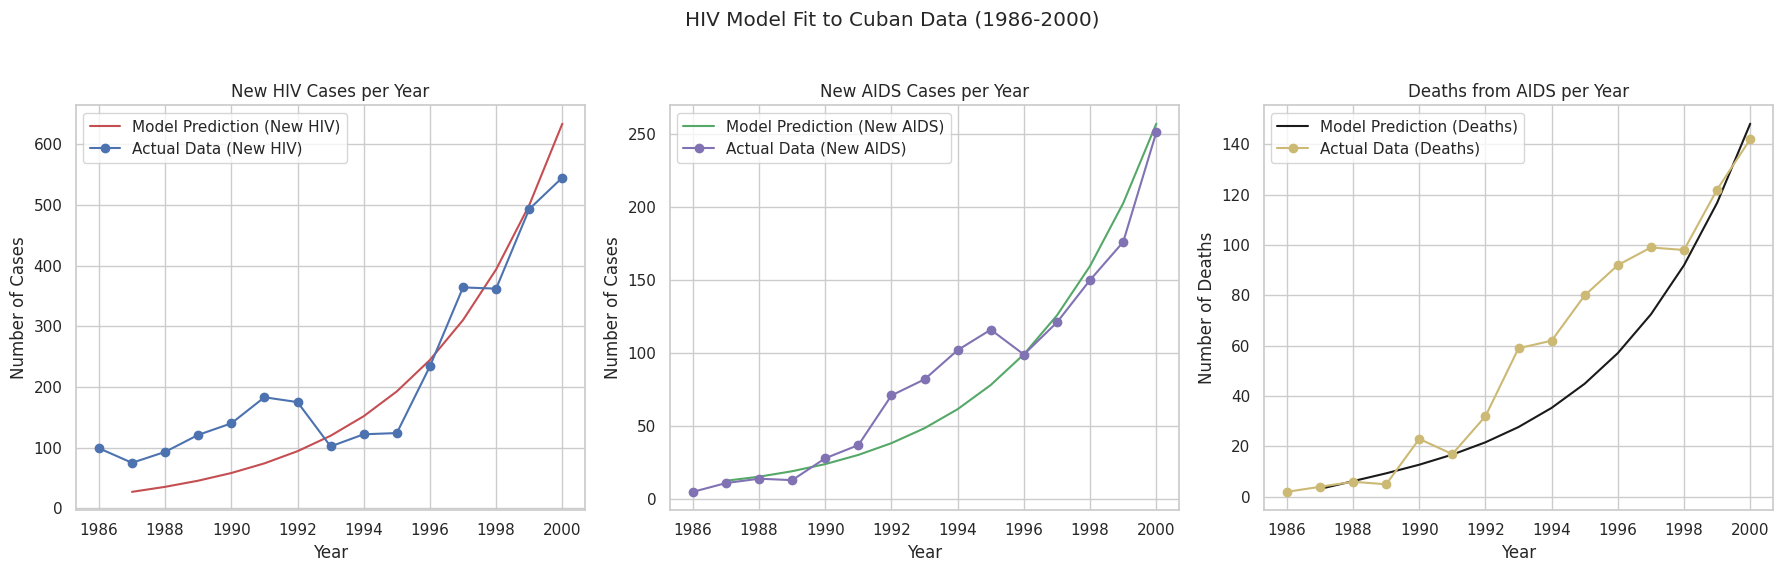

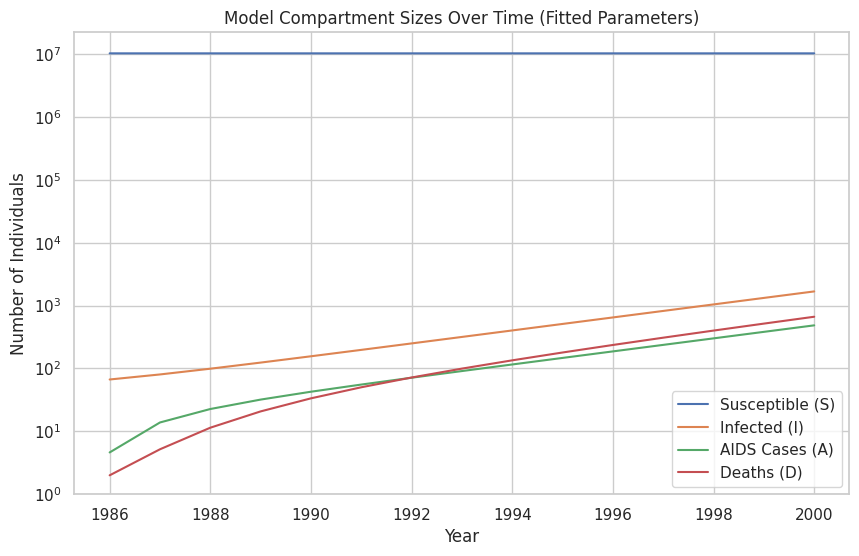


Simulating model with control (beta reduction by 50% starting 1990)...


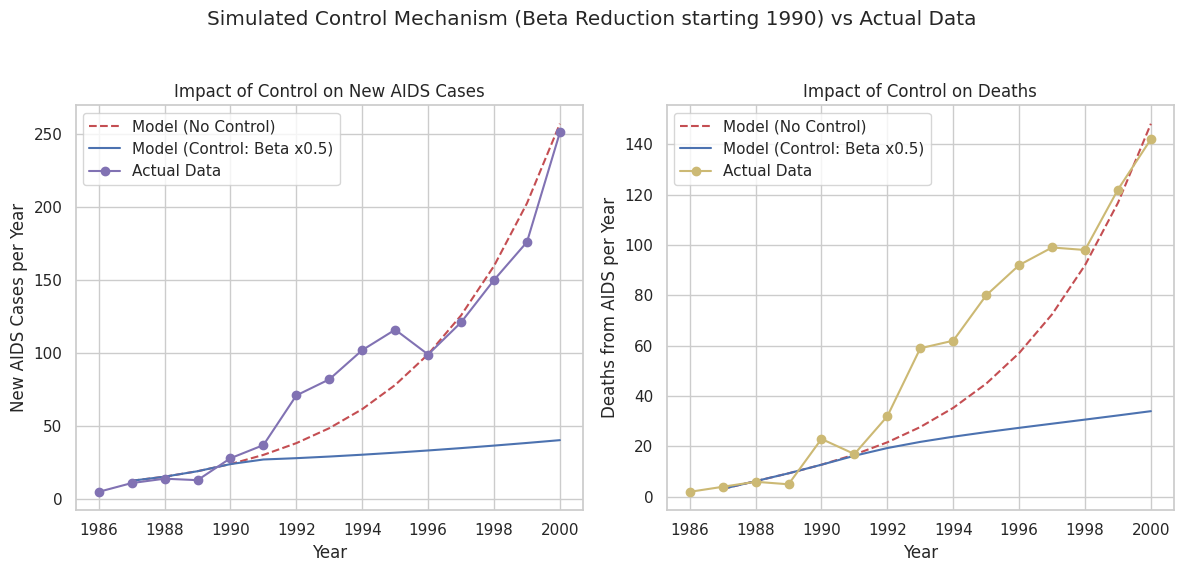


--- Discussion ---
Relevant Parameters Identified & Fitted:
 - Beta (Transmission Rate): 0.3282
 - p (Progression Rate): 0.1715 (Avg. 5.83 years to AIDS)
 - d (AIDS Death Rate): 0.3423 (Avg. 2.92 years survival with AIDS)
 - I0 (Initial Infected): 66.7
 - A0 (Initial AIDS): 4.6

Model Fit:
The plots show the comparison between the model's predicted annual new cases/deaths and the actual data.
Achieving a perfect fit across all three data series simultaneously with a simple model is challenging.
Discrepancies may arise from: model oversimplification (e.g., constant N, homogeneous mixing), 
parameter estimation difficulties, data reporting variations, or unmodeled dynamics (like changing behaviour).

Control Mechanism (Reduced Beta):
We simulated a control strategy starting in 1990 that reduced the effective transmission rate (beta) by 50%.
This could represent combined effects of education, condom use, testing, and potentially the sanatoria policy.
The simulation shows that reducing be

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# --- 1. Data ---
years = np.arange(1986, 2001)
# Use cumulative data for fitting state variables or rates for fitting flows
# Let's try fitting the rates (new cases per year)
new_hiv_cases_data = np.array([99, 75, 93, 121, 140, 183, 175, 102, 122, 124, 234, 364, 362, 493, 545])
new_aids_cases_data = np.array([5, 11, 14, 13, 28, 37, 71, 82, 102, 116, 99, 121, 150, 176, 251])
deaths_aids_data = np.array([2, 4, 6, 5, 23, 17, 32, 59, 62, 80, 92, 99, 98, 122, 142])
time_points_data = years - years[0] # Years from 1986

# --- 2. Model Definition ---
# S, I, A, D model
def hiv_model(y, t, N, beta, p, d, mu):
    S, I, A, D = y
    # Calculate derivatives
    dSdt = -beta * S * (I + A) / N  # Assuming I and A are equally infectious
    dIdt = beta * S * (I + A) / N - p * I - mu * I
    dAdt = p * I - d * A - mu * A
    dDdt = d * A
    return dSdt, dIdt, dAdt, dDdt

# --- 3. Parameters and Initial Conditions ---
# Fixed Parameters (Estimates - adjust as needed)
N_population = 10.2e6 # Approximate Cuban population around 1986-1990
mu = 1/75 # Approximate natural death rate (assuming avg lifespan 75 years)

# Initial Conditions (Need to estimate or fit)
# Use first year data as a rough guide, but these are CUMULATIVE at t=0
I0 = 100 # Initial number infected (guess)
A0 = 5   # Initial number with AIDS (guess based on 1986 data)
D0 = 2   # Initial deaths (guess based on 1986 data)
S0 = N_population - I0 - A0
y0 = [S0, I0, A0, D0]

# Time vector for simulation (daily steps for accuracy, then extract annual)
t_sim_fine = np.linspace(time_points_data[0], time_points_data[-1], int(time_points_data[-1] * 365) + 1)
t_sim_years = np.arange(time_points_data[0], time_points_data[-1] + 1) # Years 0 to 14

# --- 4. Objective Function for Fitting ---
# We need to fit beta, p, d, and potentially I0, A0

# This function calculates the sum of squared errors between model predictions
# (new cases/deaths per year) and the actual data.
def objective_function(params, y0_init, N, mu, t_sim_years, data):
    beta, p, d, logI0, logA0 = params # Fit log of initial conditions for stability
    I0_fit = np.exp(logI0)
    A0_fit = np.exp(logA0)
    D0_fit = data[2][0] # Fix initial deaths based on first data point? Or fit too?
    S0_fit = N - I0_fit - A0_fit - D0_fit

    if S0_fit < 0 or I0_fit < 0 or A0_fit < 0: # Ensure biological plausibility
      return 1e12 # Penalize invalid initial conditions

    y0_fit = [S0_fit, I0_fit, A0_fit, D0_fit]

    # Solve ODEs with current parameters
    sol = odeint(hiv_model, y0_fit, t_sim_years, args=(N, beta, p, d, mu))
    S_pred, I_pred, A_pred, D_pred = sol.T

    # Calculate predicted *new* cases/deaths per year from the model
    # Approach 1: Difference in cumulative state + deaths
    # predicted_new_hiv = np.diff(I_pred + A_pred + D_pred) # Change in total ever infected
    # Approach 2: Flux rates (more accurate theoretically)
    # Need fine simulation to estimate rates accurately, or approximate
    # Approximate flux rates over each year interval
    predicted_new_hiv = []
    predicted_new_aids = []
    predicted_deaths = []

    for i in range(len(t_sim_years) - 1):
        # Average state variables over the year interval [i, i+1]
        S_avg = (S_pred[i] + S_pred[i+1]) / 2
        I_avg = (I_pred[i] + I_pred[i+1]) / 2
        A_avg = (A_pred[i] + A_pred[i+1]) / 2
        # Approximate new HIV cases = integral(beta*S*(I+A)/N dt) ~ beta*S_avg*(I_avg+A_avg)/N * (delta_t=1 year)
        new_hiv = beta * S_avg * (I_avg + A_avg) / N
        predicted_new_hiv.append(new_hiv)
        # Approximate new AIDS cases = integral(p*I dt) ~ p*I_avg * (delta_t=1 year)
        new_aids = p * I_avg
        predicted_new_aids.append(new_aids)
        # Approximate new deaths = integral(d*A dt) ~ d*A_avg * (delta_t=1 year)
        new_deaths = d * A_avg
        predicted_deaths.append(new_deaths)

    predicted_new_hiv = np.array(predicted_new_hiv)
    predicted_new_aids = np.array(predicted_new_aids)
    predicted_deaths = np.array(predicted_deaths)

    # Compare with data (make sure lengths match)
    actual_new_hiv, actual_new_aids, actual_deaths = data

    # Calculate Sum of Squared Errors (SSE) - Weighting might be needed
    # Use data from year 1 onwards for diff/rate calculations
    error_hiv = np.sum(((predicted_new_hiv - actual_new_hiv[1:]) / np.maximum(1, actual_new_hiv[1:]))**2) # Relative error
    error_aids = np.sum(((predicted_new_aids - actual_new_aids[1:]) / np.maximum(1, actual_new_aids[1:]))**2)
    error_deaths = np.sum(((predicted_deaths - actual_deaths[1:]) / np.maximum(1, actual_deaths[1:]))**2)

    # Combine errors (maybe weight them if one fit is prioritized)
    total_error = error_hiv + error_aids + error_deaths
    # print(f"Params: b={beta:.3f}, p={p:.3f}, d={d:.3f}, I0={I0_fit:.0f}, A0={A0_fit:.0f} -> Error: {total_error:.2f}") # Debug print
    return total_error

# --- 5. Parameter Fitting ---
# Initial guesses for parameters to be fitted
# beta: Transmission rate - highly uncertain, start low
# p: Progression rate (1/p ~ years to AIDS, e.g., 10 years -> p=0.1)
# d: AIDS death rate (1/d ~ years survival with AIDS, e.g., 2 years -> d=0.5)
# I0, A0: Initial infected/AIDS counts
initial_guess = [0.5, 0.1, 0.5, np.log(I0), np.log(A0)] # beta, p, d, logI0, logA0
bounds = [(1e-3, 5.0), # beta bounds
          (1/20, 1/2), # p bounds (progression 2-20 years)
          (1/5, 1.0),  # d bounds (survival 1-5 years)
          (np.log(10), np.log(5000)), # logI0 bounds
          (np.log(1), np.log(100))]   # logA0 bounds

data_to_fit = (new_hiv_cases_data, new_aids_cases_data, deaths_aids_data)

print("Starting optimization...")
result = minimize(objective_function, initial_guess,
                  args=(y0, N_population, mu, t_sim_years, data_to_fit),
                  method='L-BFGS-B', # Method that handles bounds
                  bounds=bounds,
                  options={'disp': True, 'maxiter': 500}) # Increase maxiter if needed

if result.success:
    fitted_params = result.x
    beta_fit, p_fit, d_fit, logI0_fit, logA0_fit = fitted_params
    I0_fit = np.exp(logI0_fit)
    A0_fit = np.exp(logA0_fit)
    D0_fit = deaths_aids_data[0] # Assume D0 matches first year data
    S0_fit = N_population - I0_fit - A0_fit - D0_fit
    y0_fit = [S0_fit, I0_fit, A0_fit, D0_fit]
    print("\nOptimization Successful!")
    print(f"Fitted Parameters:")
    print(f"  beta (transmission rate): {beta_fit:.4f}")
    print(f"  p (progression rate to AIDS): {p_fit:.4f} (Avg time: {1/p_fit:.2f} years)")
    print(f"  d (AIDS death rate): {d_fit:.4f} (Avg survival: {1/d_fit:.2f} years)")
    print(f"Fitted Initial Conditions:")
    print(f"  I0 (Initial Infected): {I0_fit:.2f}")
    print(f"  A0 (Initial AIDS): {A0_fit:.2f}")
else:
    print("\nOptimization failed:", result.message)
    # Use initial guesses if optimization fails, for demonstration
    beta_fit, p_fit, d_fit, logI0_fit, logA0_fit = initial_guess
    I0_fit = np.exp(logI0_fit)
    A0_fit = np.exp(logA0_fit)
    D0_fit = deaths_aids_data[0]
    S0_fit = N_population - I0_fit - A0_fit - D0_fit
    y0_fit = [S0_fit, I0_fit, A0_fit, D0_fit]

# --- 6. Simulate with Fitted Parameters ---
print("\nSimulating model with fitted parameters...")
sol_fit = odeint(hiv_model, y0_fit, t_sim_years, args=(N_population, beta_fit, p_fit, d_fit, mu))
S_fit, I_fit, A_fit, D_fit = sol_fit.T

# Calculate predicted annual new cases/deaths from the fitted simulation
predicted_new_hiv_fit = []
predicted_new_aids_fit = []
predicted_deaths_fit = []
for i in range(len(t_sim_years) - 1):
    S_avg = (S_fit[i] + S_fit[i+1]) / 2
    I_avg = (I_fit[i] + I_fit[i+1]) / 2
    A_avg = (A_fit[i] + A_fit[i+1]) / 2
    predicted_new_hiv_fit.append(beta_fit * S_avg * (I_avg + A_avg) / N_population)
    predicted_new_aids_fit.append(p_fit * I_avg)
    predicted_deaths_fit.append(d_fit * A_avg)

predicted_new_hiv_fit = np.array(predicted_new_hiv_fit)
predicted_new_aids_fit = np.array(predicted_new_aids_fit)
predicted_deaths_fit = np.array(predicted_deaths_fit)

# --- 7. Plotting Results ---
plt.figure(figsize=(18, 6))

# Plot New HIV Cases
plt.subplot(1, 3, 1)
plt.plot(years[1:], predicted_new_hiv_fit, 'r-', label='Model Prediction (New HIV)')
plt.plot(years, new_hiv_cases_data, 'bo-', label='Actual Data (New HIV)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('New HIV Cases per Year')
plt.legend()
plt.grid(True)

# Plot New AIDS Cases
plt.subplot(1, 3, 2)
plt.plot(years[1:], predicted_new_aids_fit, 'g-', label='Model Prediction (New AIDS)')
plt.plot(years, new_aids_cases_data, 'mo-', label='Actual Data (New AIDS)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('New AIDS Cases per Year')
plt.legend()
plt.grid(True)

# Plot Deaths from AIDS
plt.subplot(1, 3, 3)
plt.plot(years[1:], predicted_deaths_fit, 'k-', label='Model Prediction (Deaths)')
plt.plot(years, deaths_aids_data, 'yo-', label='Actual Data (Deaths)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Deaths from AIDS per Year')
plt.legend()
plt.grid(True)

plt.suptitle('HIV Model Fit to Cuban Data (1986-2000)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Plot Compartment Sizes Over Time (Fitted)
plt.figure(figsize=(10, 6))
plt.plot(t_sim_years + years[0], S_fit, label='Susceptible (S)')
plt.plot(t_sim_years + years[0], I_fit, label='Infected (I)')
plt.plot(t_sim_years + years[0], A_fit, label='AIDS Cases (A)')
plt.plot(t_sim_years + years[0], D_fit, label='Deaths (D)')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.title('Model Compartment Sizes Over Time (Fitted Parameters)')
plt.legend()
plt.grid(True)
plt.yscale('log') # Use log scale to see smaller compartments
plt.ylim(bottom=1) # Avoid log(0) issues
plt.show()


# --- 8. Introducing Control Mechanisms ---

# Background: Cuba's Strategy (Research Needed)
# Cuba implemented a unique and controversial strategy early on:
# - **Universal Screening:** Widespread testing of the population.
# - **Sanatoria:** Mandatory isolation/quarantine of HIV+ individuals in sanatoria (from 1986, policy evolved over time).
# - **Health Education & Condom Promotion:** Standard public health measures.
# - **Free Healthcare:** Access to care, though effective ART was limited in this period.

# Modeling Control: Let's model a reduction in transmission rate (beta)
# due to education, condoms, and perhaps the effect of sanatoria reducing
# infectious contacts in the general population. Assume control starts in 1990.

control_start_year = 1990
control_start_time = control_start_year - years[0]
reduction_factor = 0.5 # Assume control reduces beta by 50%

# Define a time-dependent beta function
def get_beta(t, t_control_start, beta_initial, factor):
    if t < t_control_start:
        return beta_initial
    else:
        return beta_initial * factor

# Modified model function to accept time-dependent beta
def hiv_model_control(y, t, N, beta_func, p, d, mu, t_control_start, factor):
    S, I, A, D = y
    current_beta = get_beta(t, t_control_start, beta_func, factor) # Get beta at time t
    dSdt = -current_beta * S * (I + A) / N
    dIdt = current_beta * S * (I + A) / N - p * I - mu * I
    dAdt = p * I - d * A - mu * A
    dDdt = d * A
    return dSdt, dIdt, dAdt, dDdt

print(f"\nSimulating model with control (beta reduction by {(1-reduction_factor)*100:.0f}% starting {control_start_year})...")
sol_control = odeint(hiv_model_control, y0_fit, t_sim_years,
                     args=(N_population, beta_fit, p_fit, d_fit, mu, control_start_time, reduction_factor))
S_ctrl, I_ctrl, A_ctrl, D_ctrl = sol_control.T

# Calculate predicted annual new AIDS cases and Deaths with control
predicted_new_aids_ctrl = []
predicted_deaths_ctrl = []
for i in range(len(t_sim_years) - 1):
    t_mid = (t_sim_years[i] + t_sim_years[i+1]) / 2
    current_beta_ctrl = get_beta(t_mid, control_start_time, beta_fit, reduction_factor)
    I_avg_ctrl = (I_ctrl[i] + I_ctrl[i+1]) / 2
    A_avg_ctrl = (A_ctrl[i] + A_ctrl[i+1]) / 2
    predicted_new_aids_ctrl.append(p_fit * I_avg_ctrl)
    predicted_deaths_ctrl.append(d_fit * A_avg_ctrl)

predicted_new_aids_ctrl = np.array(predicted_new_aids_ctrl)
predicted_deaths_ctrl = np.array(predicted_deaths_ctrl)

# --- 9. Comparison Plot: No Control vs. Control vs. Actual Data ---
plt.figure(figsize=(12, 6))

# Plot New AIDS Cases Comparison
plt.subplot(1, 2, 1)
plt.plot(years[1:], predicted_new_aids_fit, 'r--', label='Model (No Control)')
plt.plot(years[1:], predicted_new_aids_ctrl, 'b-', label=f'Model (Control: Beta x{reduction_factor})')
plt.plot(years, new_aids_cases_data, 'mo-', label='Actual Data')
plt.xlabel('Year')
plt.ylabel('New AIDS Cases per Year')
plt.title('Impact of Control on New AIDS Cases')
plt.legend()
plt.grid(True)

# Plot Deaths from AIDS Comparison
plt.subplot(1, 2, 2)
plt.plot(years[1:], predicted_deaths_fit, 'r--', label='Model (No Control)')
plt.plot(years[1:], predicted_deaths_ctrl, 'b-', label=f'Model (Control: Beta x{reduction_factor})')
plt.plot(years, deaths_aids_data, 'yo-', label='Actual Data')
plt.xlabel('Year')
plt.ylabel('Deaths from AIDS per Year')
plt.title('Impact of Control on Deaths')
plt.legend()
plt.grid(True)

plt.suptitle(f'Simulated Control Mechanism (Beta Reduction starting {control_start_year}) vs Actual Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 10. Discussion ---
print("\n--- Discussion ---")
print(f"Relevant Parameters Identified & Fitted:")
print(f" - Beta (Transmission Rate): {beta_fit:.4f}")
print(f" - p (Progression Rate): {p_fit:.4f} (Avg. {1/p_fit:.2f} years to AIDS)")
print(f" - d (AIDS Death Rate): {d_fit:.4f} (Avg. {1/d_fit:.2f} years survival with AIDS)")
print(f" - I0 (Initial Infected): {I0_fit:.1f}")
print(f" - A0 (Initial AIDS): {A0_fit:.1f}")
print(f"\nModel Fit:")
print("The plots show the comparison between the model's predicted annual new cases/deaths and the actual data.")
print("Achieving a perfect fit across all three data series simultaneously with a simple model is challenging.")
print("Discrepancies may arise from: model oversimplification (e.g., constant N, homogeneous mixing), ")
print("parameter estimation difficulties, data reporting variations, or unmodeled dynamics (like changing behaviour).")

print(f"\nControl Mechanism (Reduced Beta):")
print(f"We simulated a control strategy starting in {control_start_year} that reduced the effective transmission rate (beta) by {(1-reduction_factor)*100:.0f}%.")
print("This could represent combined effects of education, condom use, testing, and potentially the sanatoria policy.")
print("The simulation shows that reducing beta leads to a decrease in projected new AIDS cases and deaths compared to the 'no control' scenario.")

print(f"\nComparison with Cuba's Strategy:")
print("Cuba's actual strategy was multifaceted, including extensive testing, health education, free healthcare, and the unique sanatoria policy.")
print("The sanatoria aimed to directly reduce transmission by isolating infectious individuals.")
print("Our modeled 'beta reduction' crudely captures the *potential impact* of such measures on transmission.")
print("Comparing the 'control' simulation curve to the actual data gives an idea of whether such a reduction level aligns with observed trends.")
print("The actual data shows a continued rise in cases/deaths, although perhaps slower than an uncontrolled epidemic might have been.")
print("Factors not explicitly modeled include the evolution of the sanatoria policy, introduction of treatments (even if not fully effective ART yet),")
print("changes in population behavior, and the specific lag times between infection, AIDS diagnosis, and reporting.")
print("Cuba's low prevalence compared to other Caribbean nations is often attributed to its comprehensive and early response, despite controversies.")
print("A more complex model could incorporate specific aspects like screening rates or a separate 'quarantined' compartment to better reflect the sanatoria.")